In [ ]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

In [1]:
library(dplyr)
library(ggplot2)
library(ggthemes)
library(reshape2)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [11]:
data <- read.csv("../input/cities_r2.csv")

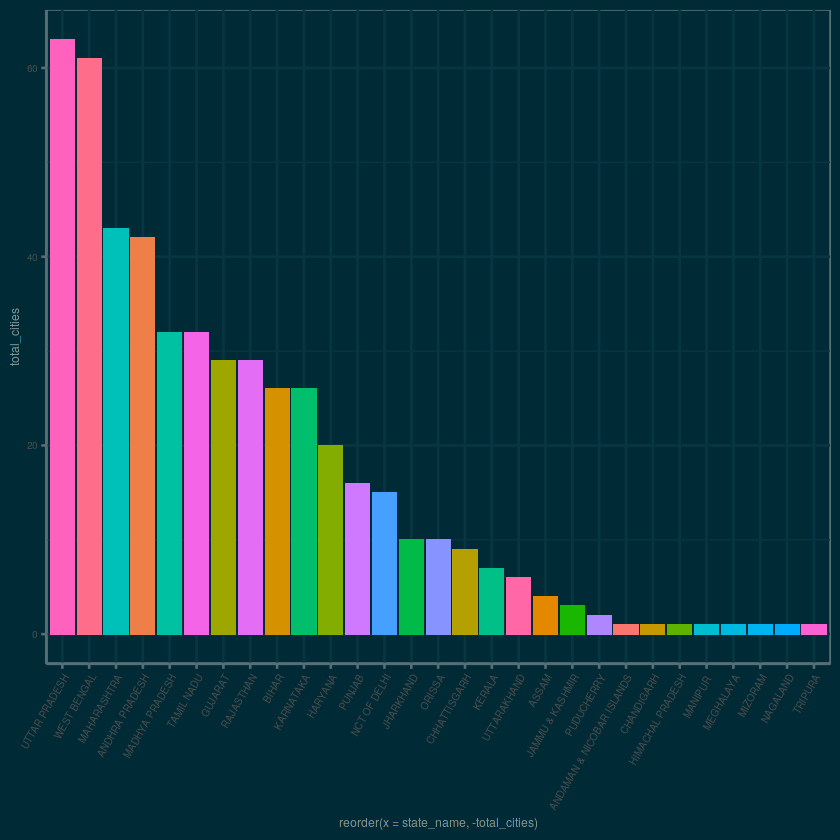

In [19]:
data %>% 
  group_by(state_name) %>% 
  summarise(total_cities = n_distinct(name_of_city)) %>% 
  arrange(desc(total_cities)) %>% 
  ggplot(aes(reorder(x = state_name, -total_cities), y = total_cities))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Number of Cities Per State", x = "States", y = "Total Cities"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=7),
        axis.text.x = element_text(angle=60, hjust=1),
        legend.position = "none")

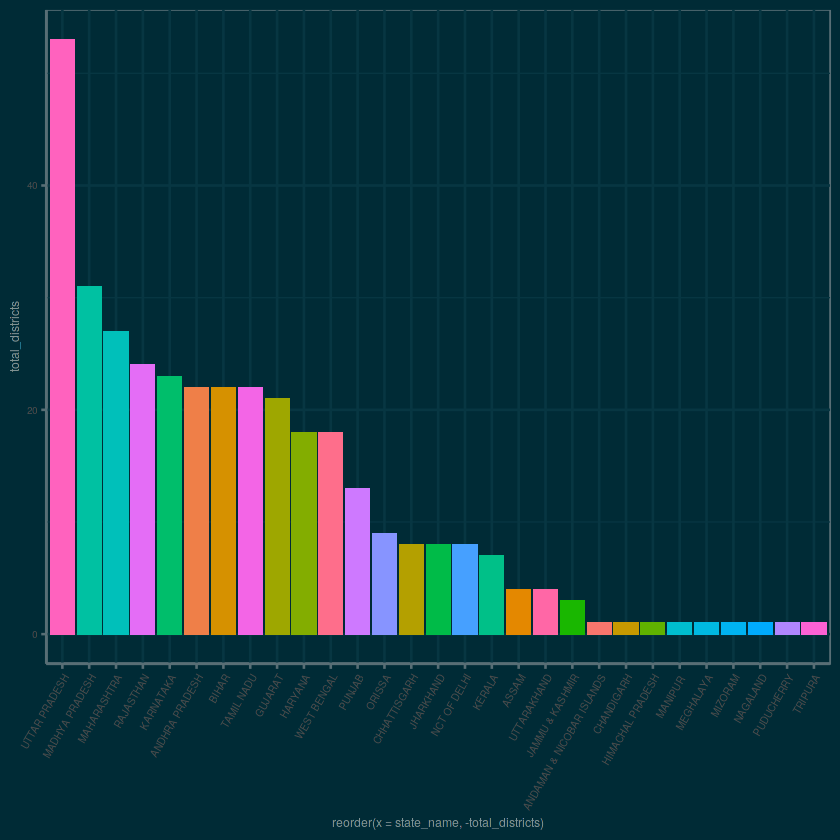

In [20]:
data %>% 
  group_by(state_name) %>% 
  summarise(total_districts = n_distinct(dist_code)) %>% 
  arrange(desc(total_districts)) %>% 
  ggplot(aes(reorder(x = state_name, -total_districts), y = total_districts))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Number of Districts Per State", x = "States", y = "Total Districts"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("red")+
  theme(text = element_text(size=7),
        axis.text.x = element_text(angle=60, hjust=1),
        legend.position = "none")

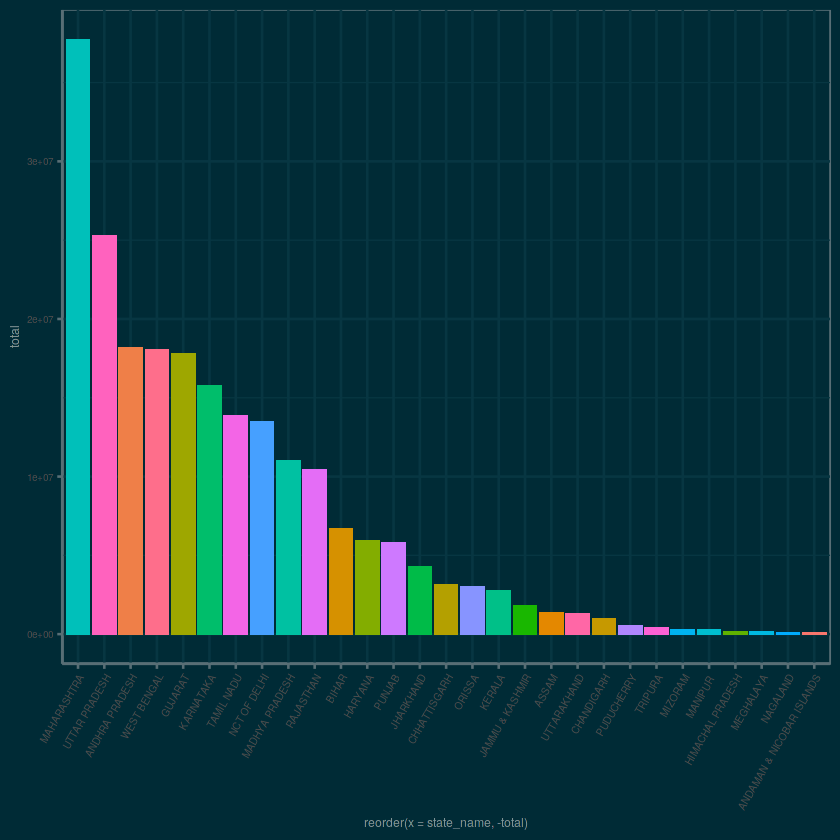

In [22]:
data %>% 
  group_by(state_name) %>% 
  summarise(total = sum(population_total)) %>% 
  arrange(desc(total)) %>% 
  ggplot(aes(reorder(x = state_name, -total), y = total))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Total Population Per State", x = "States", y = "Total Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=7),
        axis.text.x = element_text(angle=60, hjust=1),
        legend.position = "none")


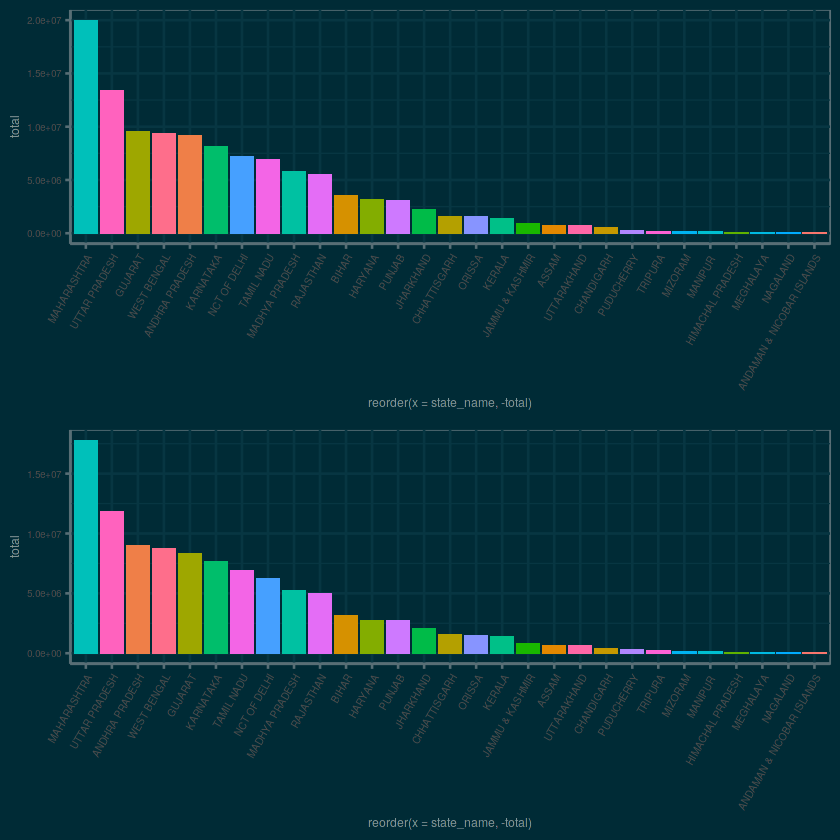

In [23]:
P1<-data %>% 
  group_by(state_name) %>% 
  summarise(total = sum(population_male)) %>% 
  arrange(desc(total)) %>% 
  ggplot(aes(reorder(x = state_name, -total), y = total))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Total Male Population Per State", x = "States", y = "Total Male Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=7),
        axis.text.x = element_text(angle=60, hjust=1),
        legend.position = "none")

P2<-data %>% 
  group_by(state_name) %>% 
  summarise(total = sum(population_female)) %>% 
  arrange(desc(total)) %>% 
  ggplot(aes(reorder(x = state_name, -total), y = total))+
  geom_bar(aes(fill = state_name), stat = "identity")+
  labs(list(title = "Total Female Population Per State", x = "States", y = "Total Female Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=7),
        axis.text.x = element_text(angle=60, hjust=1),
        legend.position = "none")

grid.arrange(P1, P2, nrow =2)

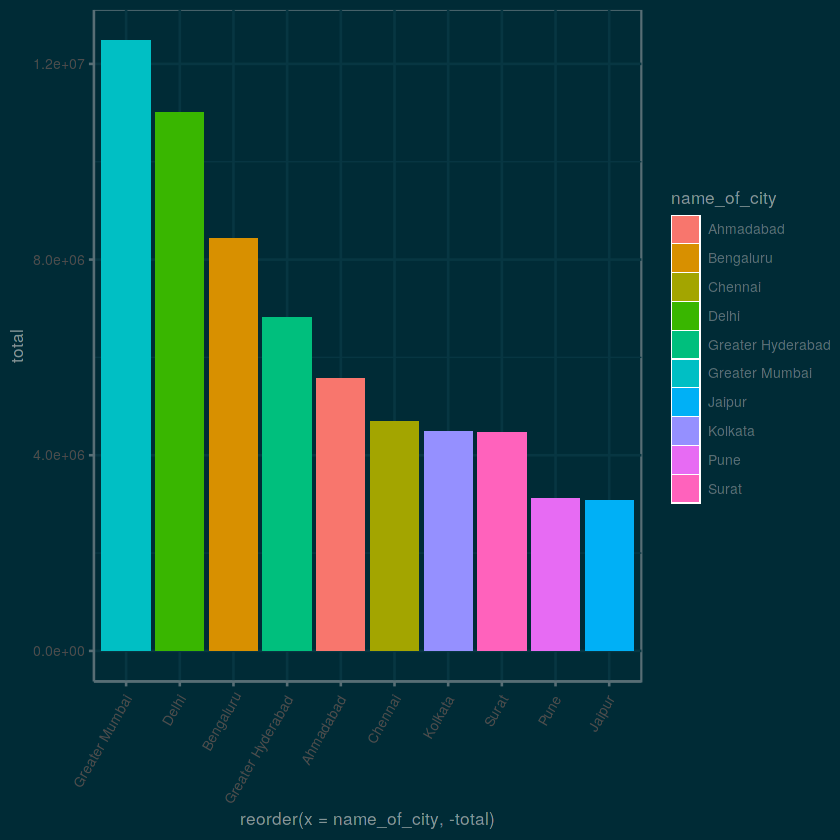

In [25]:
data %>% 
  group_by(name_of_city) %>% 
  summarise(total = sum(population_total)) %>% 
  arrange(desc(total)) %>% 
  top_n(n= 10, wt = total) %>% 
  ggplot(aes(reorder(x = name_of_city, -total), y = total))+
  geom_bar(aes(fill = name_of_city), stat = "identity")+
  labs(list(title = "Total Population Per City", x = "City", y = "Total Population"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=10),
        axis.text.x = element_text(angle=60, hjust=1))

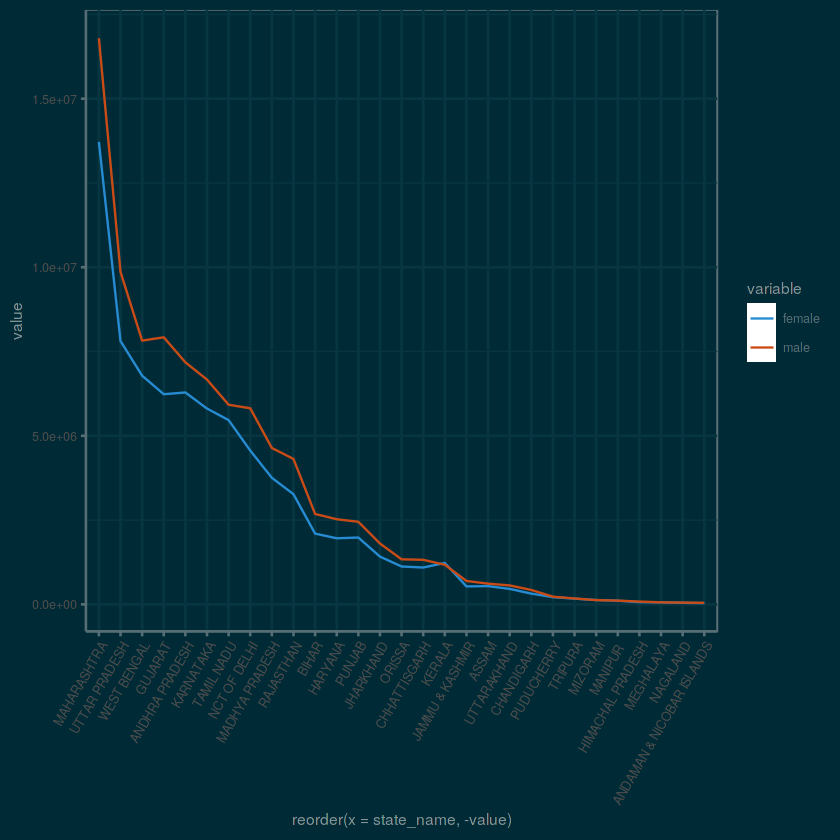

In [27]:
literate <-data %>% 
  group_by(state_name) %>% 
  summarise(female = sum(literates_female),
            male = sum(literates_male))

mdata<-melt(df_literate, id = "state_name")

ggplot(aes(reorder(x = state_name, -value), y = value, group = variable), data = mdata)+
  geom_line(aes(color = variable))+
  labs(list(title = "Total Number of literates(Male Vs Female)", x = "State", y = "Total Number of Literates"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=9),
        axis.text.x = element_text(angle=60, hjust=1))

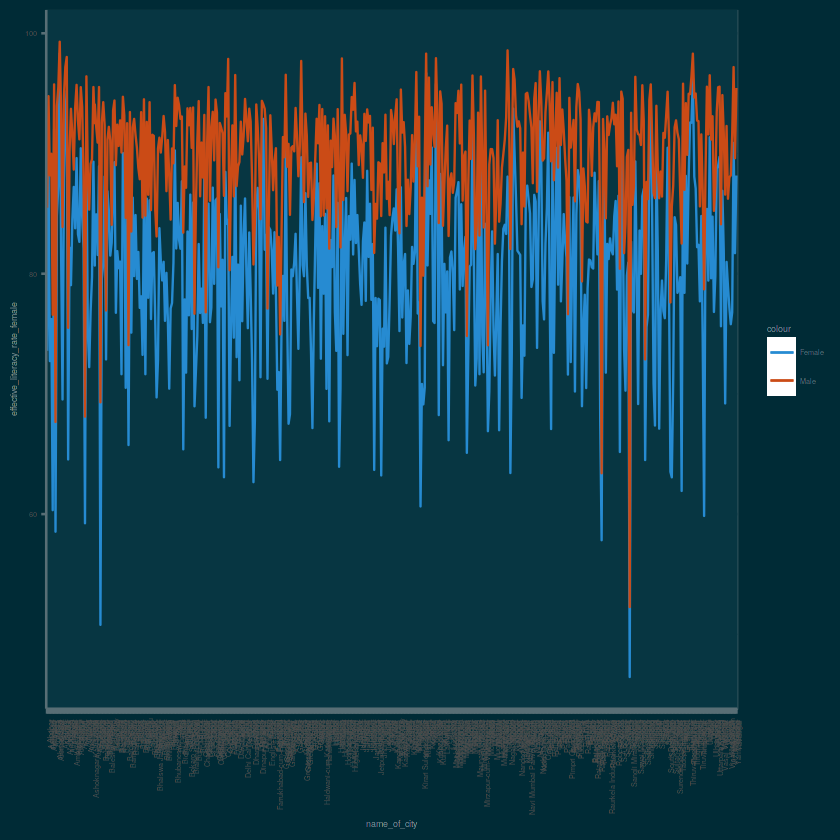

In [30]:
ggplot(aes(x = name_of_city, group = 1 ), data = df)+
  geom_line(aes(y = effective_literacy_rate_female, colour = "Female")) +
  geom_line(aes(y = effective_literacy_rate_male, colour = "Male")) +
  labs(list(title = "Literacy Rate Comparison(Male Vs Female)", x = "Cities", y = "Literacy Rate"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=5),
        axis.text.x = element_text(angle=90, hjust=1))

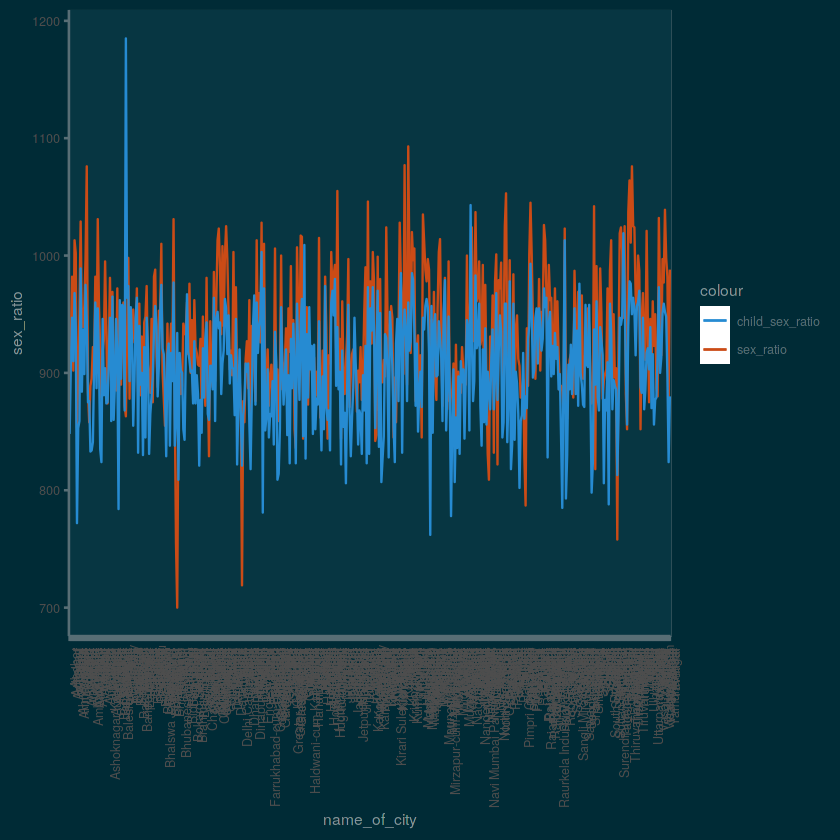

In [10]:
ggplot(aes(x = name_of_city, group = 1 ), data = df)+
  geom_line(aes(y = sex_ratio, colour = "sex_ratio")) +
  geom_line(aes(y = child_sex_ratio, colour = "child_sex_ratio")) +
  labs(list(title = "Sex Ratio Vs Child Sex Ratio", x = "Cities", y = "Ratio"))+
  theme_solarized(light=FALSE)+
  scale_colour_solarized("blue")+
  theme(text = element_text(size=9),
        axis.text.x = element_text(angle=90, hjust=1))